In [1]:
import pandas as pd

import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score 

from sklearn import metrics

from sklearn.tree import DecisionTreeClassifier 

import scipy.stats as stats

import numpy as np

from sklearn import tree

from sklearn.model_selection import GridSearchCV

#import graphviz 

In [155]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [156]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [139]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [157]:
df = df.dropna()
df = df.drop_duplicates()

In [142]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [158]:
df = pd.get_dummies(df,columns = ['gender','ever_married', 'work_type', 'Residence_type', 'smoking_status'], drop_first= 'True')
df.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,228.69,36.6,1,1,0,1,0,1,0,0,1,1,0,0
2,31112,80.0,0,1,105.92,32.5,1,1,0,1,0,1,0,0,0,0,1,0
3,60182,49.0,0,0,171.23,34.4,1,0,0,1,0,1,0,0,1,0,0,1
4,1665,79.0,1,0,174.12,24.0,1,0,0,1,0,0,1,0,0,0,1,0
5,56669,81.0,0,0,186.21,29.0,1,1,0,1,0,1,0,0,1,1,0,0


In [159]:
all_features = [
    'age','hypertension','heart_disease',
    'avg_glucose_level', 'bmi', 'gender_Male','ever_married_Yes','work_type_Never_worked',
    'work_type_Private','work_type_Self-employed','work_type_children',
    'Residence_type_Urban','smoking_status_never smoked','smoking_status_smokes'
]


In [160]:
original_cols = df.columns

z_score_cols = []

# Loop through our target columns
for col in all_features:
    # Make the new column name the same as the original but with 'z_score' added to it
    new_col_name = col + "_zscore"
    
    # Set the new column equal to the score
    df[new_col_name] = stats.stats.zscore( df[col] )
    
    # Set the z-score to its absolute value of the for easier filtering
    df[new_col_name] = abs( df[new_col_name] )
    
    # Append the new column name our our z_score_cols list for easier access for later.
    z_score_cols.append(new_col_name)


condition = df[z_score_cols] < 3
print(df.shape)

# # Say TRUE only if all of the rows are True, else return False
condition = condition.all(axis=1)

print('Before removal of outliers', df.shape)

df = df[condition]

print('After removal of outliers', df.shape)

(4909, 32)
Before removal of outliers (4909, 32)
After removal of outliers (4172, 32)


In [161]:
df = df[original_cols]
print('After removal of outliers', df.shape)

After removal of outliers (4172, 18)


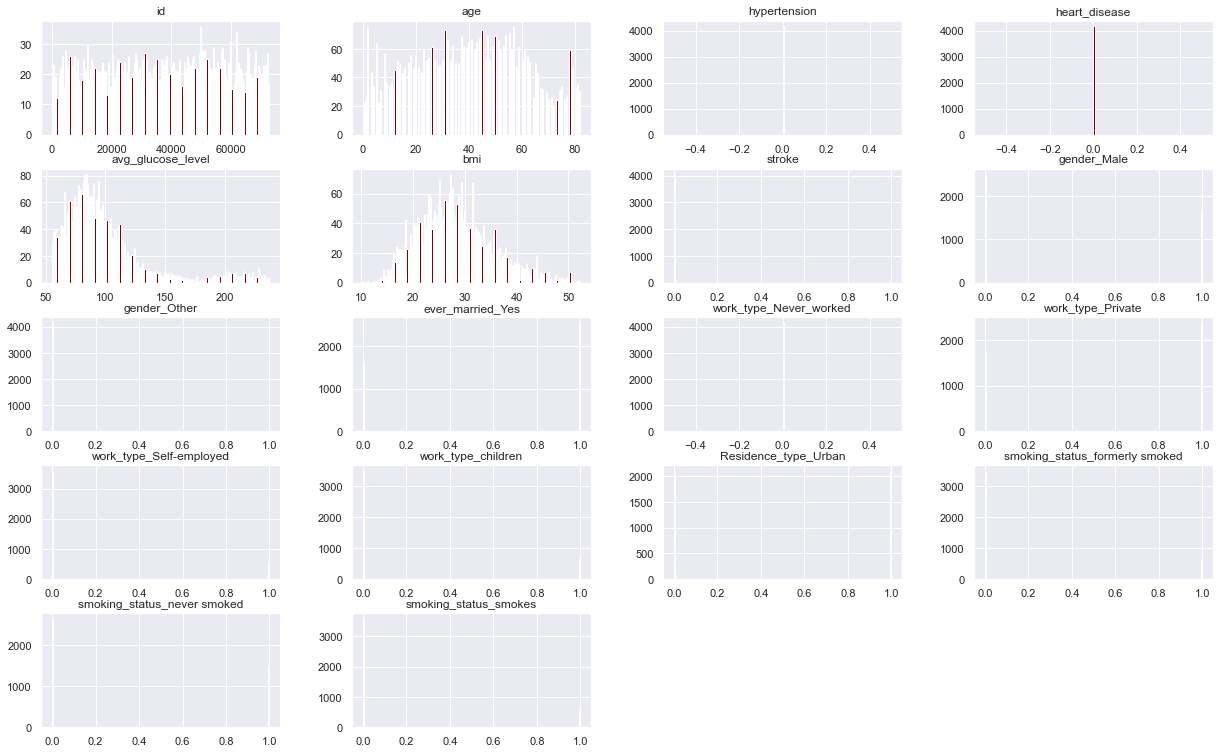

In [147]:
df.hist(bins=200, figsize=(21,13), color='maroon');


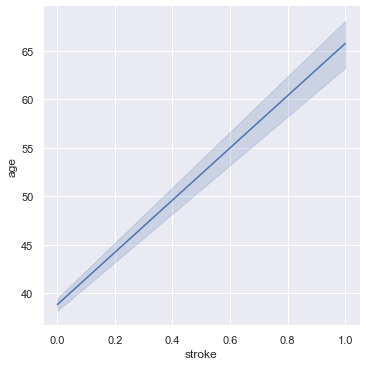

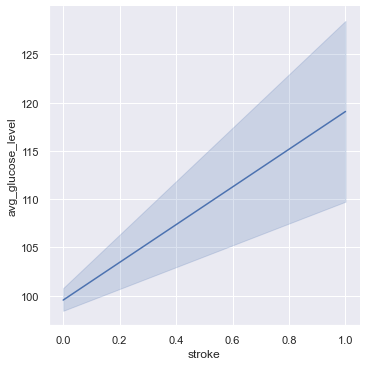

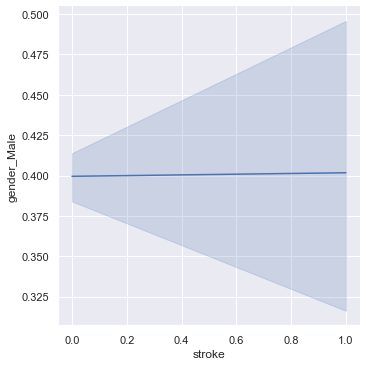

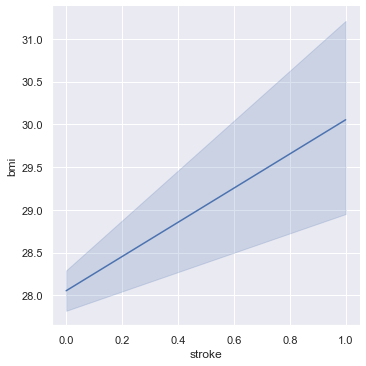

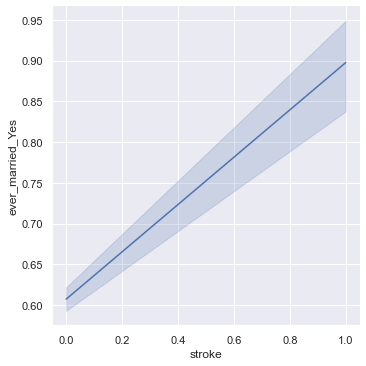

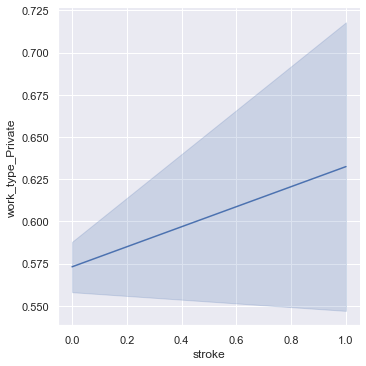

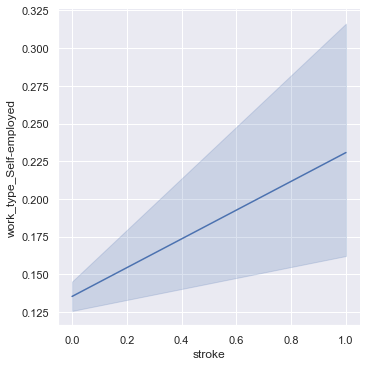

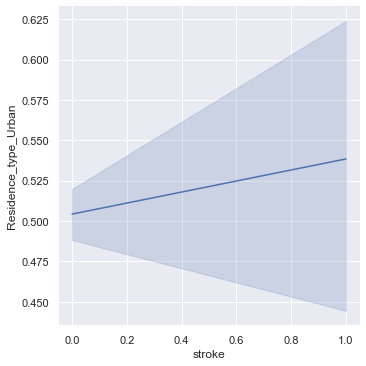

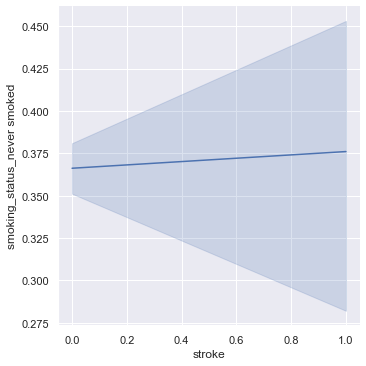

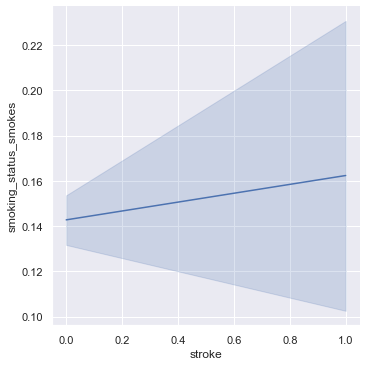

In [148]:
for feature in features:
    sns.relplot(data = df, y = feature, x = 'stroke', kind='line', height=5, aspect=1)

In [162]:
features = ['age','avg_glucose_level','gender_Male',
            'bmi','ever_married_Yes','work_type_Private',
            'work_type_Self-employed','Residence_type_Urban',
            'smoking_status_never smoked','smoking_status_smokes' 
           ]

In [163]:
#DecisionTreeClassifier
X = df[features].values

y = df['stroke'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4 , random_state = 45)


In [ ]:
Decision_Tree_model = DecisionTreeClassifier(max_depth = 14,
                                                class_weight = "balanced")

Decision_Tree_model.fit(X_train,y_train)

y_pred = Decision_Tree_model.predict(X_test)

In [110]:
accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy Score: %f" % accuracy)

precision = precision_score(y_true=y_test, y_pred=y_pred)
print("Precision Score: %f" % precision)

recall = recall_score(y_true=y_test, y_pred=y_pred)
print("Recall Score: %f" % recall)

f1 = f1_score(y_true=y_test, y_pred=y_pred)
print('F1 Score: %f' % f1)

# Calculate predicted probabilities
y_pred_proba = Decision_Tree_model.predict_proba(X_test)

# # Keep only the proba for True
y_pred_proba = y_pred_proba[:,1]

# # Compute auc score
auc = roc_auc_score(y_true=y_test, y_score=y_pred_proba)

print('AUC Score: %f' % auc)

r_squared = metrics.r2_score(y_test, y_pred)
print('R-Squared Score:', r_squared)

mae = metrics.mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

Accuracy Score: 0.928101
Precision Score: 0.141304
Recall Score: 0.240741
F1 Score: 0.178082
AUC Score: 0.595660
R-Squared Score: -1.2965256277949777
Mean Absolute Error: 0.07189934092270821


In [102]:
dot_data = tree.export_graphviz(Decision_Tree_model, out_file=None, 
                     feature_names = features,
                     class_names = ['stroke','no_stroke'],
                     filled = True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

NameError: name 'graphviz' is not defined

In [ ]:
params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth': [20,30,60,70,80,90,100], 
    'min_samples_split': [20,25,30,40],
    'min_samples_leaf': [25,30,33,35],
    'class_weight' :["balanced","None"],
    'max_leaf_nodes':[25,30,35,40],
        }
grid_search_cv =  GridSearchCV( 
    estimator = DecisionTreeClassifier(), 
    param_grid = params, 
    scoring = 'f1')


# Now, with one easy command, fit all combination of trees. 
grid_search_cv.fit(X_train, y_train)

# Print the best parameters it found
print(grid_search_cv.best_params_)

# This command gives you the best tree
GridSearchCV_model = grid_search_cv.best_estimator_

In [ ]:
dot_data = tree.export_graphviz(model, out_file=None, 
                     feature_names=features,
                     class_names=['stroke','no_stroke'],
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

In [84]:
import sklearn
for i in sklearn.metrics.SCORERS.keys():
    print(i)

explained_variance
r2
max_error
neg_median_absolute_error
neg_mean_absolute_error
neg_mean_absolute_percentage_error
neg_mean_squared_error
neg_mean_squared_log_error
neg_root_mean_squared_error
neg_mean_poisson_deviance
neg_mean_gamma_deviance
accuracy
top_k_accuracy
roc_auc
roc_auc_ovr
roc_auc_ovo
roc_auc_ovr_weighted
roc_auc_ovo_weighted
balanced_accuracy
average_precision
neg_log_loss
neg_brier_score
adjusted_rand_score
rand_score
homogeneity_score
completeness_score
v_measure_score
mutual_info_score
adjusted_mutual_info_score
normalized_mutual_info_score
fowlkes_mallows_score
precision
precision_macro
precision_micro
precision_samples
precision_weighted
recall
recall_macro
recall_micro
recall_samples
recall_weighted
f1
f1_macro
f1_micro
f1_samples
f1_weighted
jaccard
jaccard_macro
jaccard_micro
jaccard_samples
jaccard_weighted


In [136]:
# Now lets evaluate our model
y_pred = GridSearchCV_model.predict(X_test)

accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy Score: %f" % accuracy)

precision = precision_score(y_true=y_test, y_pred=y_pred)
print("Precision Score: %f" % precision)

recall = recall_score(y_true=y_test, y_pred=y_pred)
print("Recall Score: %f" % recall)

f1 = f1_score(y_true=y_test, y_pred=y_pred)
print('F1 Score: %f' % f1)

# Calculate predicted probabilities, keep only probability for when class = 1
y_pred_proba = GridSearchCV_model.predict_proba(X_test)[:,1]
auc = roc_auc_score(y_true=y_test, y_score=y_pred_proba)
print('AUC Score: %f' % auc)

Accuracy Score: 0.793289
Precision Score: 0.083095
Recall Score: 0.537037
F1 Score: 0.143921
AUC Score: 0.677852


In [136]:
# Now lets look at our feature importances
my_dict = {'feature_importance': GridSearchCV_model.feature_importances_,
           'feature':features }
feature_imp = pd.DataFrame.from_dict( my_dict ).sort_values('feature_importance', ascending=False)
feature_imp

,feature_importance,feature
1,0.374057,avg_glucose_level
3,0.297235,bmi
0,0.170351,age
6,0.048573,work_type_Self-employed
8,0.031456,smoking_status_never smoked
2,0.029894,gender_Male
5,0.016184,work_type_Private
4,0.013800,ever_married_Yes
7,0.012326,Residence_type_Urban
9,0.006125,smoking_status_smokes


In [151]:
#Random Forest model
from sklearn.ensemble import RandomForestClassifier

Forest_model = RandomForestClassifier()

Forest_model.fit(X_train, y_train)

# Now lets evaluate our model
y_pred = Forest_model.predict(X_test)

accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy Score: %f" % accuracy)

precision = precision_score(y_true=y_test, y_pred=y_pred)
print("Precision Score: %f" % precision)

recall = recall_score(y_true=y_test, y_pred=y_pred)
print("Recall Score: %f" % recall)

f1 = f1_score(y_true=y_test, y_pred=y_pred)
print('F1 Score: %f' % f1)

# Calculate predicted probabilities, keep only probability for when class = 1
y_pred_proba = Forest_model.predict_proba(X_test)[:,1]
auc = roc_auc_score(y_true=y_test, y_score=y_pred_proba)
print('AUC Score: %f' % auc)

Accuracy Score: 0.967645
Precision Score: 0.000000
Recall Score: 0.000000
F1 Score: 0.000000
AUC Score: 0.792438


/Users/wynnin11/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
params = {
    'n_estimators' : [20,30,40, 50, 100],
    'criterion' : ['gini', 'entropy'],
    'max_depth': [14,16,20, 100], 
    'min_samples_split': [2,4,5,6, 10, 100],
    'max_features': [2, 4,6, 'auto'],
    'class_weight' :["balanced","None"]
}

grid_search_cv = GridSearchCV( 
    estimator=RandomForestClassifier(), 
    param_grid=params,
    scoring='f1' )


# Now, with one easy command, fit all combination of trees. 
grid_search_cv.fit(X_train, y_train)


# Print the best parameters it found
print(grid_search_cv.best_params_)


# This command gives you model that has the highest f1-score. 
Forest_model = grid_search_cv.best_estimator_

In [ ]:
# Now lets evaluate our model
y_pred = Forest_model.predict(X_test)

accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy Score: %f" % accuracy)

precision = precision_score(y_true=y_test, y_pred=y_pred)
print("Precision Score: %f" % precision)

recall = recall_score(y_true=y_test, y_pred=y_pred)
print("Recall Score: %f" % recall)

f1 = f1_score(y_true=y_test, y_pred=y_pred)
print('F1 Score: %f' % f1)

# Calculate predicted probabilities, keep only probability for when class = 1
y_pred_proba = Forest_model.predict_proba(X_test)[:,1]
auc = roc_auc_score(y_true=y_test, y_score=y_pred_proba)
print('AUC Score: %f' % auc)

In [ ]:
# Now lets look at our feature importances
feature_imp = pd.Series(Forest_model.feature_importances_,index=features).sort_values(ascending=False)
feature_imp

In [ ]:
import pickle
filename = 'Forest_model.sav'
pickle.dump(Forest_model, open(filename, 'wb'))

In [ ]:
filename = 'GridSearchCV_model.sav'
pickle.dump(GridSearchCV_model, open(filename, 'wb'))

In [168]:
import pickle
filename = 'Decision_Tree_model.sav'
pickle.dump(Decision_Tree_model, open(filename, 'wb'))

In [ ]:
Decision_Tree_model = pickle.load(open(filename, 'rb'))

In [25]:
df.stroke.value_counts()

0    4055
1     117
Name: stroke, dtype: int64